# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

In [23]:
#use our prepared churn data from week 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('clean_churn_data.csv', index_col='Unnamed: 0')
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_total_chg_ratio
0,7590-VHVEG,1,0,12,1,29.85,29.85,0,1.000000
1,5575-GNVDE,34,1,1,2,56.95,1889.50,0,0.030140
2,3668-QPYBK,2,1,12,2,53.85,108.15,1,0.497920
3,7795-CFOCW,45,0,1,3,42.30,1840.75,0,0.022980
4,9237-HQITU,2,1,12,1,70.70,151.65,1,0.466205
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,2,84.80,1990.50,0,0.042602
7039,2234-XADUH,72,1,1,4,103.20,7362.90,0,0.014016
7040,4801-JZAZL,11,0,12,1,29.60,346.45,0,0.085438
7041,8361-LTMKD,4,1,12,2,74.40,306.60,1,0.242661


In [25]:
#break our data into features and targets, and train and test sets
features = df.drop(['customerID', 'Churn'], axis=1)
print('Features')
print(features)
targets = df['Churn']
print('Targets')
print(targets)

Features
      tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
0          1             0        12              1           29.85   
1         34             1         1              2           56.95   
2          2             1        12              2           53.85   
3         45             0         1              3           42.30   
4          2             1        12              1           70.70   
...      ...           ...       ...            ...             ...   
7038      24             1         1              2           84.80   
7039      72             1         1              4          103.20   
7040      11             0        12              1           29.60   
7041       4             1        12              2           74.40   
7042      66             1         2              3          105.65   

      TotalCharges  monthly_total_chg_ratio  
0            29.85                 1.000000  
1          1889.50                 0.030140  


In [27]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)
print("x_train")
print(x_train)
print("x_test")
print(x_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)
#default size is 25% test size

x_train
      tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
6661      72             0         2              4           53.65   
4811       4             1        12              2           46.00   
2193      56             1         1              2           21.20   
1904      56             1        12              1           94.45   
6667       9             1        12              1           79.55   
...      ...           ...       ...            ...             ...   
4250      63             1         1              4          104.50   
1488       1             1        12              2           51.25   
6303      71             1         2              1          109.25   
2710      24             1         1              4           20.40   
5639       6             1        12              2           20.65   

      TotalCharges  monthly_total_chg_ratio  
6661       3784.00                 0.014178  
4811        193.60                 0.237603  
2

In [28]:
#use sklearn to fit a decision tree to the training data
##plot the decision tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.993563044301401
0.7257240204429302


In [29]:
dt.get_depth()

26

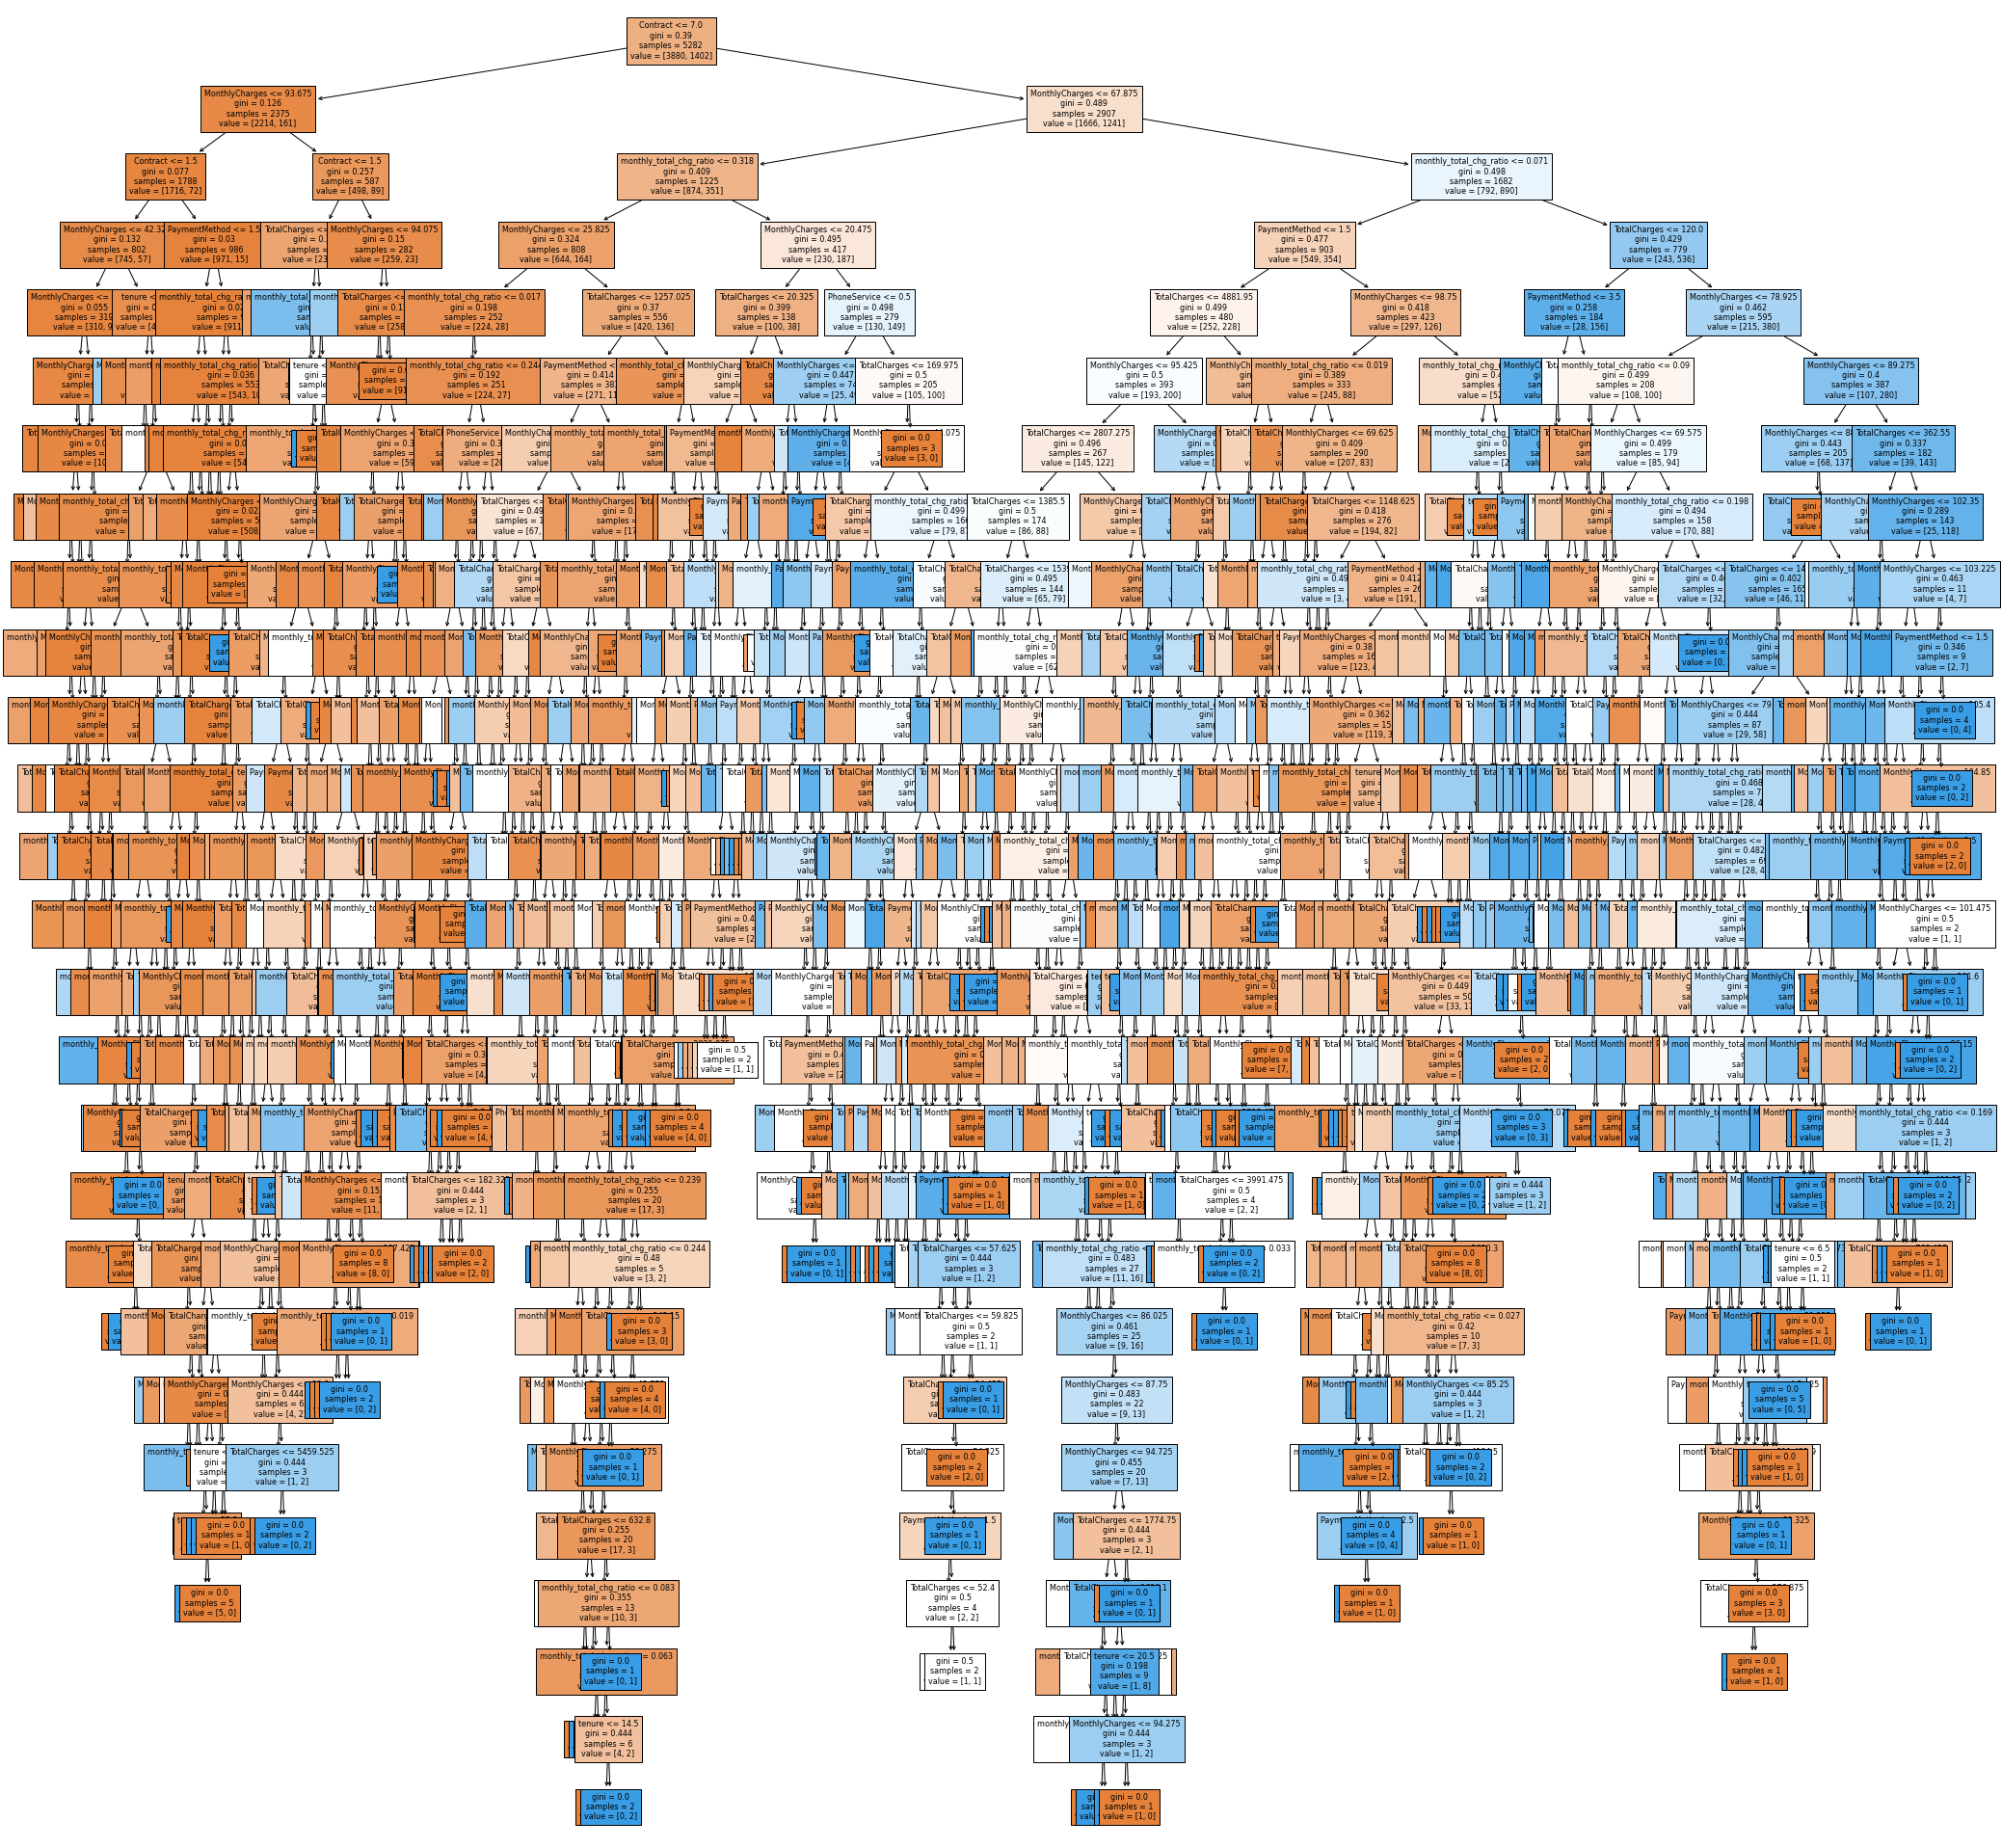

In [30]:
f = plt.figure(figsize=(35, 35))
_ = plot_tree(dt, fontsize=8, feature_names=features.columns, filled=True)

In [31]:
##change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
for x in range(3,20):
    print(f'\nCurrent Depth: {x}')
    dt = DecisionTreeClassifier(max_depth=x)
    dt.fit(x_train, y_train)
    print(dt.score(x_train, y_train))
    print(dt.score(x_test, y_test))


Current Depth: 3
0.7900416508898145
0.7796706416808632

Current Depth: 4
0.7942067398712609
0.7842135150482681

Current Depth: 5
0.7985611510791367
0.7779670641680864

Current Depth: 6
0.807080651268459
0.778534923339012

Current Depth: 7
0.8176826959485044
0.7768313458262351

Current Depth: 8
0.8309352517985612
0.7779670641680864

Current Depth: 9
0.8455130632336236
0.7751277683134583

Current Depth: 10
0.8612268080272624
0.760931289040318

Current Depth: 11
0.8756152972358955
0.7546848381601363

Current Depth: 12
0.8953048087845513
0.7495741056218058

Current Depth: 13
0.9113971980310488
0.7501419647927314

Current Depth: 14
0.9295721317682696
0.7444633730834753

Current Depth: 15
0.9396062097690269
0.7387847813742192

Current Depth: 16
0.9564558879212419
0.7359454855195912

Current Depth: 17
0.965921999242711
0.7314026121521863

Current Depth: 18
0.9744414994320333
0.7285633162975582

Current Depth: 19
0.9793638773191973
0.7251561612720046


In [32]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.7942067398712609
0.7842135150482681


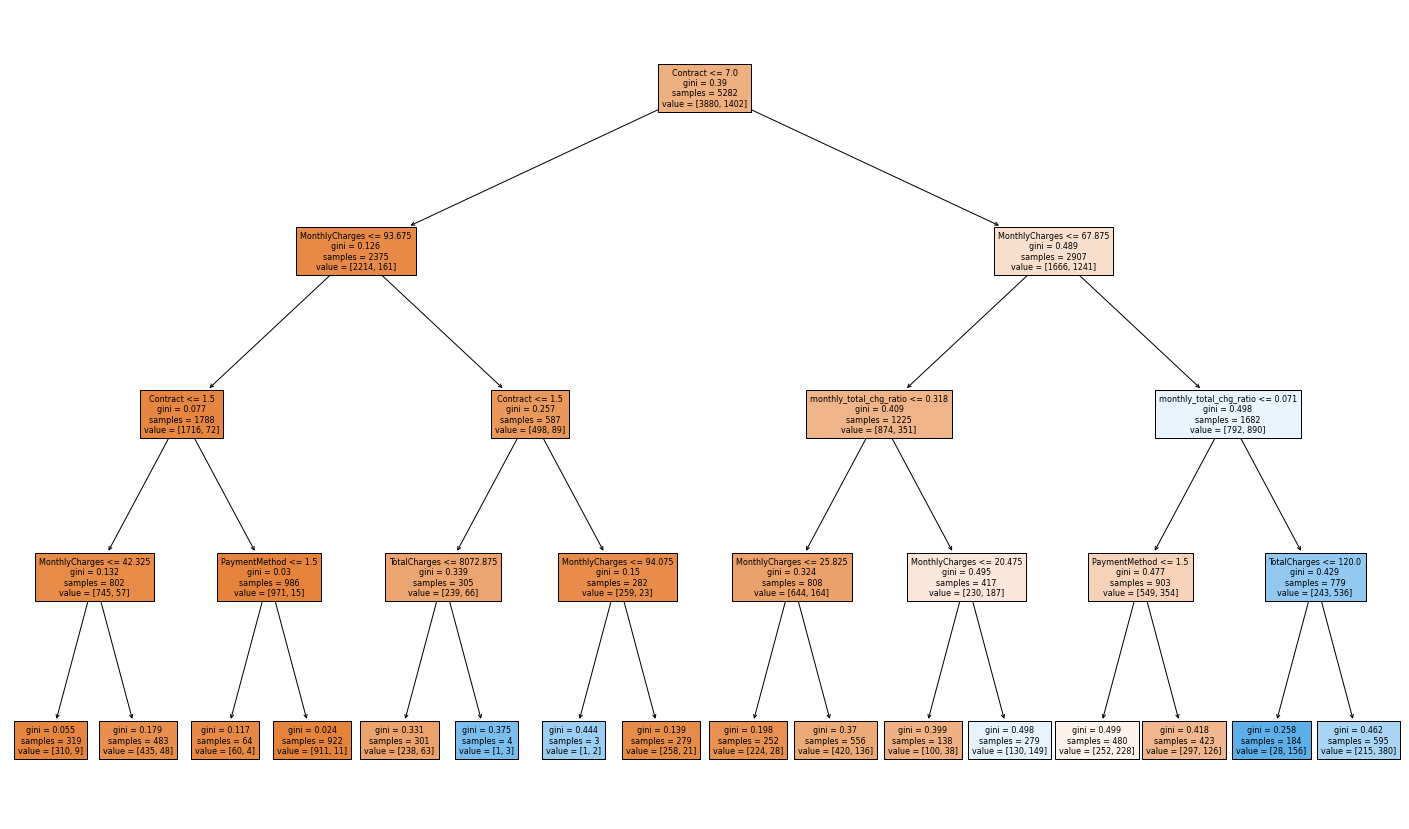

In [33]:
f = plt.figure(figsize=(25, 15))
_ = plot_tree(dt, fontsize=8, feature_names=features.columns, filled=True)

<AxesSubplot:>

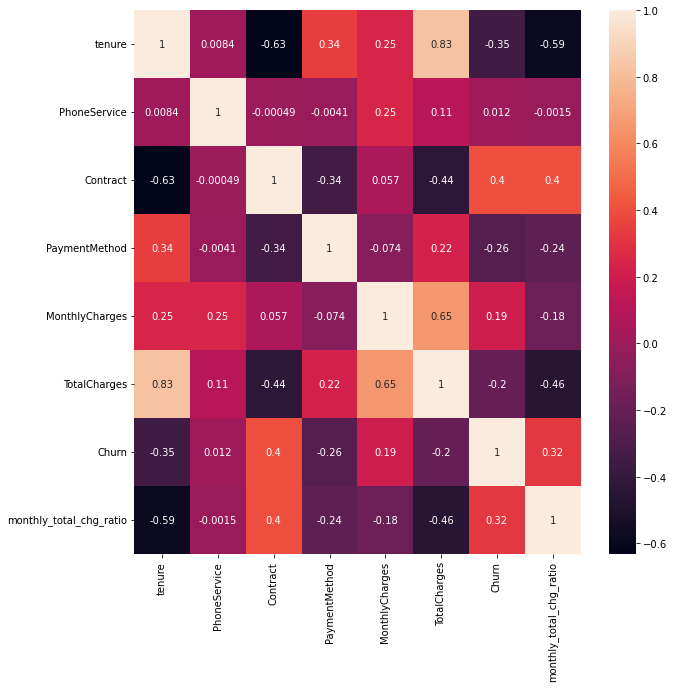

In [34]:
#plot the correlations between features and targets
import seaborn as sns
f = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [35]:
#use sklearn to fit a random forest model to predict churn from our dataset
from sklearn.ensemble import RandomForestClassifier

for x in range(2, 10):
    rfc = RandomForestClassifier(max_depth=x, random_state=42)
    rfc.fit(x_train, y_train)
    print(f'\nCurrent Max Depth: {x}')
    print(rfc.score(x_train, y_train))
    print(rfc.score(x_test, y_test))


Current Max Depth: 2
0.7798182506626278
0.7751277683134583

Current Max Depth: 3
0.7885270730783794
0.78137421919364

Current Max Depth: 4
0.7978038621734191
0.787052810902896

Current Max Depth: 5
0.807080651268459
0.7921635434412265

Current Max Depth: 6
0.812570995834911
0.7955706984667802

Current Max Depth: 7
0.8241196516471033
0.7961385576377058

Current Max Depth: 8
0.8386974630821659
0.7961385576377058

Current Max Depth: 9
0.8604695191215449
0.7950028392958546


In [36]:
#choosing max depth 7 because it's the most accurate and still not overfitted (too much)
rfc = RandomForestClassifier(max_depth=7, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8241196516471033
0.7961385576377058


In [37]:
for x in range(2, 8):
    rfc = RandomForestClassifier(max_depth=7, max_features=x, random_state=42)
    rfc.fit(x_train, y_train)
    print(f'\nCurrent Max Features: {x}')
    print(rfc.score(x_train, y_train))
    print(rfc.score(x_test, y_test))


Current Max Features: 2
0.8241196516471033
0.7961385576377058

Current Max Features: 3
0.8301779628928436
0.7961385576377058

Current Max Features: 4
0.829420673987126
0.7927314026121521

Current Max Features: 5
0.8305566073457024
0.794434980124929

Current Max Features: 6
0.8318818629307081
0.7859170925610448

Current Max Features: 7
0.8324498296099963
0.7898921067575241


<AxesSubplot:title={'center':'Feature Importance'}>

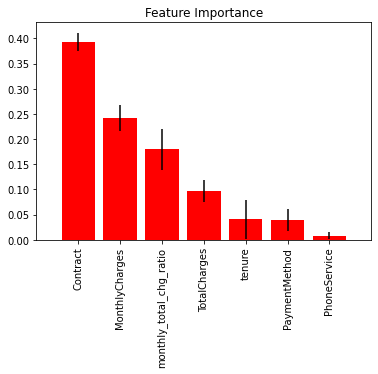

In [38]:
#so, default max features is the most accurate. still not overperforming the decision tree by a lot but at least by a little bit
##plot the feature importances from the random forest
from scikitplot.estimators import plot_feature_importances
plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

In [40]:
#choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
new_features = features.drop(['tenure', 'PaymentMethod', 'PhoneService'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)
for x in range(2, 8):
    rfc = RandomForestClassifier(max_depth=x, random_state=42)
    rfc.fit(x_train, y_train)
    print(f'\nCurrent Max Depth: {x}')
    print(rfc.score(x_train, y_train))
    print(rfc.score(x_test, y_test))



Current Max Depth: 2
0.7872018174933737
0.7762634866553095

Current Max Depth: 3
0.7904202953426732
0.7773992049971608

Current Max Depth: 4
0.7966679288148428
0.7853492333901193

Current Max Depth: 5
0.8038621734191594
0.7859170925610448

Current Max Depth: 6
0.8097311624384703
0.787052810902896

Current Max Depth: 7
0.8218477849299508
0.7853492333901193


In [42]:
for x in range(2, 5):
    rfc = RandomForestClassifier(max_depth=6, max_features=x, random_state=42)
    rfc.fit(x_train, y_train)
    print(f'\nCurrent Max Features: {x}')
    print(rfc.score(x_train, y_train))
    print(rfc.score(x_test, y_test))


Current Max Features: 2
0.8097311624384703
0.787052810902896

Current Max Features: 3
0.8112457402499054
0.7853492333901193

Current Max Features: 4
0.8127603180613404
0.7853492333901193


In [43]:
# choosing max depth of 6 and max features as 2 because that leads to the highest test accuracy without being overfitted/underfitted too much
rfc = RandomForestClassifier(max_depth=6, max_features=2, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8097311624384703
0.787052810902896


<AxesSubplot:title={'center':'Feature Importance'}>

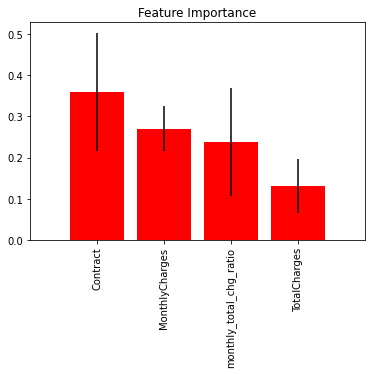

In [44]:
##examine the feature importances after removing less important features
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

# Summary

Be sure to write a summary of your work and explain the results.

# Analysis of Work
During the assignment above, I explored decision trees and feature importance/selection as well as correlation heatmaps. Below is a short list of the actions I performed as well an analysis of their results:
- I imported the clean_churn_data dataset and set the target as the churn, and the features as all the numerical columns (dropping 'Customer ID' as it is categorical).
- I created a train and test dataset based on the default train/test ratio of 25%.
- I fit the training data to a decision tree classifier.
 - The depth was 26 and the decision tree was terribly cluttered.
 - The training accuracy was 0.9936 and the test accuracy was 0.7257.
- Using a for-loop which iterates through max_depth, I optimized the max_depth of the decision tree.
 - The optimum max_depth was 4.
 - The new training accuracy was 0.7942 and the test accuracy was 0.7842. Much less over-fitted than before.
- I plotted the new decision tree (with new max_depth of 4)
- I plotted the pearson correlation heatmap to show correlations between all features and target.
 - 'Tenure', 'PaymentMethod', and 'PhoneService' all have negative correlations.
- I created a RandomForestClassifier, and used 2 for-loops to optimize the max_depth and max_features.
 - Optimal max_depth was 7 and optimal max_features was default.
 - New training accuracy was 0.8241 and new test accuracy was 0.7961. The RFC out-performed the decision tree just slightly.
- I plotted the feature importance chart. I then dropped the Tenure, PaymentMethod, and PhoneService features as they had a negative correlation. I then used the same 2 for-loops to optimize the max_depth and max_features of the new dataset with the dropped features.
 - Optimal max_depth was 6 and optimal max_features was 2.
 - The new trainin accuracy was 0.8097 and the new test accuracy was 0.7871.
- I re-plotted the feature importance, showing the new dataset with the dropped features.

Thank you! Please let me know if you have any questions.

All the best,
Jeremy